In [1]:
import os
cwd = os.getcwd()
jaxqualin_path = os.path.join(cwd, os.pardir, os.pardir)

In [2]:
import sys
sys.path.insert(0, jaxqualin_path)

In [3]:
import postprocess
import plot
import QuasinormalMode
import spheroidal

from postprocess import *
from plot import *
from QuasinormalMode import *
from spheroidal import *


2023-08-31 15:32:36.764618: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cm/shared/apps/slurm/current/lib64/slurm:/cm/shared/apps/slurm/current/lib64
2023-08-31 15:32:37.107301: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cm/shared/apps/slurm/current/lib64/slurm:/cm/shared/apps/slurm/current/lib64
2023-08-31 15:32:37.136680: W external/org_tensorflow/tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIB

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import os
from importlib import reload
import configparser

In [105]:
reload(postprocess)
reload(plot)
reload(QuasinormalMode)
reload(spheroidal)
from postprocess import *
from plot import *
from QuasinormalMode import *
from spheroidal import *

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [106]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [107]:
ROOT_PATH = jaxqualin_path
FIT_SAVE_PATH = os.path.join(jaxqualin_path, "pickle/fits")
PLOT_PATH_ROOT = os.path.join(jaxqualin_path, "plots/")
PLOT_PATH = os.path.join(PLOT_PATH_ROOT, "paper_plots/")
CONFIG_PATH = os.path.join(ROOT_PATH, "config")

In [108]:
sim_num = '0305'
setting_name = 'normal2'
load_pickle = True
mode_searcher_load_pickle = True
CCE = False

config_file_path = os.path.join(CONFIG_PATH, f"{setting_name}.ini")
config = configparser.ConfigParser()
config.optionxform = str

config.read(config_file_path)
config_sections = config._sections
kwargs = config_sections['basic']
flatness_checker_kwargs = config_sections['flatness_checker']
mode_searcher_kwargs = config_sections['mode_searcher']
for key in kwargs:
    kwargs[key] = eval(kwargs[key])
for key in flatness_checker_kwargs:
    flatness_checker_kwargs[key] = eval(flatness_checker_kwargs[key])
for key in mode_searcher_kwargs:
    mode_searcher_kwargs[key] = eval(mode_searcher_kwargs[key])

kwargs.update(flatness_checker_kwargs = flatness_checker_kwargs,
               mode_searcher_kwargs = mode_searcher_kwargs)
    
mode_search_complete = ModeSearchAllFreeVaryingNSXSAllRelevant(
                                                    sim_num, 
                                                    load_pickle = load_pickle, 
                                                    mode_searcher_load_pickle = mode_searcher_load_pickle,
                                                    postfix_string = setting_name,
                                                    pickle_in_scratch = True,
                                                    CCE = CCE,
                                                    **kwargs
                                                              )

TypeError: 'list' object is not callable

In [109]:
mode_search_complete.do_all_searches()

reloaded lm = 2.2 from an old run.
reloaded lm = 3.2 from an old run.
reloaded lm = 3.3 from an old run.
reloaded lm = 4.4 from an old run.
reloaded lm = 2.0 from an old run.
reloaded lm = 2.1 from an old run.
reloaded lm = 5.5 from an old run.
reloaded lm = 6.6 from an old run.


In [110]:
relevant_lm_list = mode_search_complete.relevant_lm_list
l, m = 2, 2
lm_indx = relevant_lm_list.index((l,m))

In [111]:
mode_searcher_vary_N = mode_search_complete.relevant_lm_mode_searcher_varying_N[lm_indx].mode_searcher_vary_N
passed_modes_len = 0
for i, mode_searcher in enumerate(mode_searcher_vary_N.mode_searchers):
    passed_modes_len_i = len(mode_searcher.mode_selector.passed_mode_list)
    if passed_modes_len_i > passed_modes_len:
        passed_modes_len = passed_modes_len_i
        best_run_indx = i

if not CCE:
    h, Mf, af, Level, retro = get_waveform_SXS(sim_num, l, m)
else:
    h = mode_searcher_vary_N.h

t0_arr = mode_searcher_vary_N.t0_arr
best_mode_searcher = mode_searcher_vary_N.mode_searchers[best_run_indx]
best_N_free = best_mode_searcher.N_init
best_found_modes = best_mode_searcher.found_modes
best_passed_modes = best_mode_searcher.mode_selector.passed_mode_list

Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/rhOverM_Asymptotic_GeometricUnits_CoM.h5
Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/metadata.json


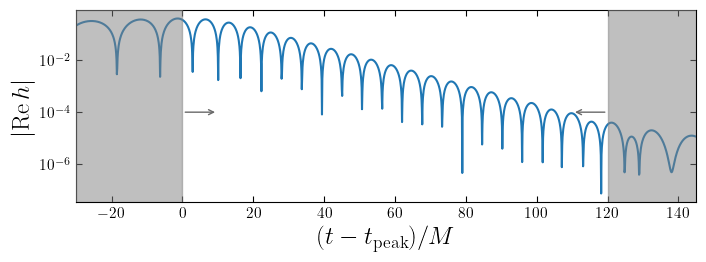

In [115]:
time, hplotr, hploti = h.postmerger(t0 = -30, t1 = 145)
fig, ax = plt.subplots(figsize = (8, 2.5))

ax.semilogy(time, np.abs(hplotr))
ax.axvspan(time[0], time[-1], color = 'white')
ax.axvspan(time[0], 0, alpha=0.5, color='grey', zorder = 100)
ax.axvspan(120, time[-1], alpha=0.5, color='grey', zorder = 100)

ax.annotate("", xy=(10, 1e-4), xytext=(0, 1e-4),
            arrowprops=dict(arrowstyle="->", color = 'dimgrey'))

ax.annotate("", xy=(110, 1e-4), xytext=(120, 1e-4),
            arrowprops=dict(arrowstyle="->", color = 'dimgrey'))

ax.set_xlim(time[0], time[-1])
ax.set_xlabel(r"$(t - t_{\rm peak})/M$")
ax.set_ylabel(r"$|{\rm Re} \, h|$")

plt.savefig(os.path.join(PLOT_PATH, f"waveform.pdf"), 
            transparent = True, 
            bbox_inches = 'tight')

In [120]:
N_free_i = 5
N_list = [mode_searcher.N_init for mode_searcher in mode_searcher_vary_N.mode_searchers]
plot_i = N_list.index(N_free_i)

In [121]:
mode_searcher_i = mode_searcher_vary_N.mode_searchers[plot_i]
found_modes_i = mode_searcher_i.found_modes
passed_modes_i = mode_searcher_i.mode_selector.passed_mode_list
present_modes_i = [found_modes.string() for found_modes in found_modes_i]
black_all_modes_i = [passed_mode.string() for passed_mode in passed_modes_i]

In [122]:
if CCE:
    run_string_prefix = f"CCE{sim_num}_lm_{l}.{m}"
else:
    run_string_prefix = f"SXS{sim_num}_lm_{l}.{m}"

fitter_free = QNMFitVaryingStartingTime(
                            h, t0_arr, N_free = N_free_i,
                            qnm_fixed_list = [], load_pickle = True,
                            run_string_prefix = run_string_prefix, random_initial = True,
                            initial_num = 10)

In [123]:
fitter_free.do_fits()
result_free_i = fitter_free.result_full

reloaded fit SXS0305_lm_2.2_N_5_t0_0.0000_50.0000_501 from an old run.


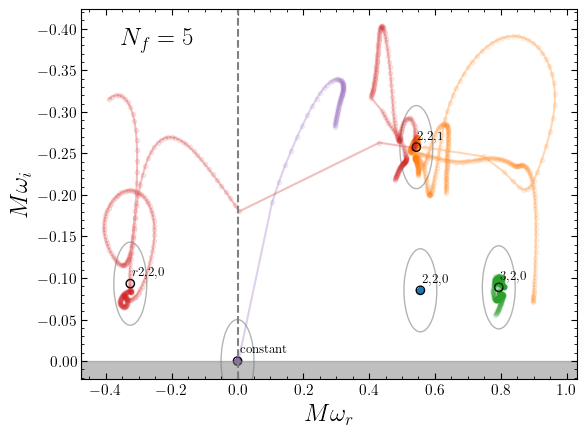

In [124]:
fig, ax = plt.subplots()
plot_omega_free(result_free_i, scatter_size = 10, ax = ax, scatter_alpha = 0.1,
                color_indicate = True, color_indicate_list=[4,1,0,3,2])
plot_predicted_qnms(ax, 
                    passed_modes_i,
                    [],
                    ellipse_qnm_list=passed_modes_i,
                    edgecolor = 'dimgray',
                    ellipse_facecolor='none',
                    ellipse_edgecolor='dimgray',
                    change_lim=False,
                    label_offset=(0,0),
                    present_modes = black_all_modes_i,
                #     present_modes_retro = present_modes_retro,
                    expand_points = (1.1, 1.9)
                    )
ax.text(0.08, 0.95, f"$N_f = {N_free_i}$", 
        transform=ax.transAxes, 
        fontsize=18, 
        verticalalignment='top')

plt.savefig(os.path.join(PLOT_PATH, f"agnostic_fit.pdf"), 
            transparent = True, 
            bbox_inches = 'tight')

In [125]:
best_flatness_checker = mode_searcher_vary_N.flatness_checkers[best_run_indx]
best_fitter_list = best_flatness_checker.fitter_list
fitter_list_i = mode_searcher_vary_N.flatness_checkers[plot_i].fitter_list

In [126]:
color_dict = {"2.2.0" : 'C0',
              "2.2.1" : 'C1',
              "3.2.0" : 'C2',
              "2.-2.0" : 'C3',
              "constant" : 'C4',
              "3.3.0": 'C5'}

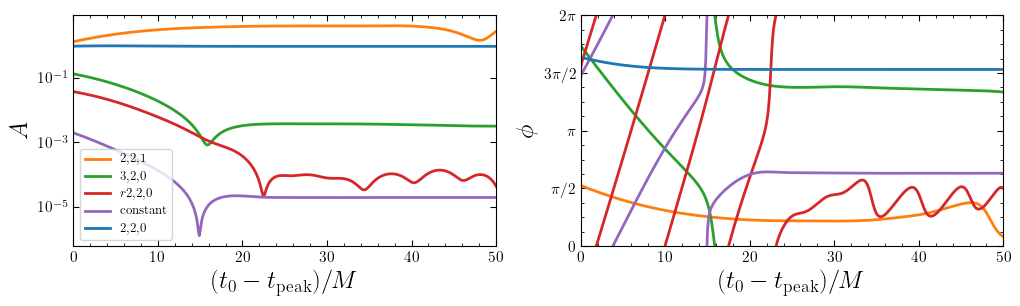

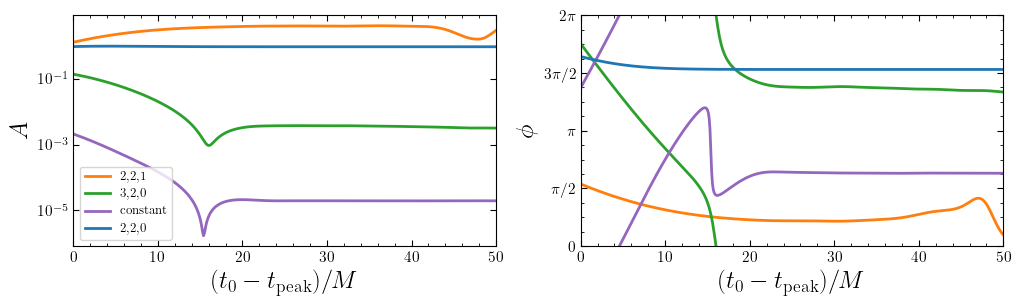

In [127]:
for i, fitter in enumerate(fitter_list_i):
    result = fitter.result_full
    fig, axs = plt.subplots(1,2, figsize = (12, 3))

    for qnm in result.qnm_fixed_list:
        if not hasattr(qnm, 'lmnx_retro'):
            qnm.init_lmnx_retro()

    axs[0].axvspan(-10, 60, color = 'white')
    axs[1].axvspan(-10, 60, color = 'white')
    plot_amplitudes(result, fixed_modes = result.qnm_fixed_list, ax = axs[0], legend = True, color_dict = color_dict)
    plot_phases(result, fixed_modes = result.qnm_fixed_list, ax = axs[1], legend = False, color_dict = color_dict)

    axs[0].legend(fontsize = 9)

    plt.savefig(os.path.join(PLOT_PATH, f"fixed_fit_{i}.pdf"), 
            transparent = True, 
            bbox_inches = 'tight')

In [128]:
best_fluc_least_indx_list = best_flatness_checker.fluc_least_indx_list

In [129]:
found_modes_strings = qnms_to_string(best_flatness_checker.found_modes)

In [130]:
bold_dict = {}
for fluc_least_indx, found_mode_string in zip(best_fluc_least_indx_list, found_modes_strings):
    bold_dict[found_mode_string] = (fluc_least_indx, fluc_least_indx + 100)

In [131]:
bold_dict

{'2.2.1': (216, 316),
 '3.3.0': (377, 477),
 '2.2.0': (364, 464),
 'constant': (399, 499),
 '3.2.0': (376, 476),
 '2.-2.0': (357, 457)}

In [132]:
result = best_fitter_list[-1].result_full

In [133]:
#hardcoded
t_start_dict = {'2.2.1': 9.8,
 '3.3.0': 33.1,
 '3.2.0': 20.3,
 '2.-2.0': 32.2,
 'constant': 14.5,
 '2.2.0': 0.0}

for key in t_start_dict:
    t_start_dict[key] += 0.5

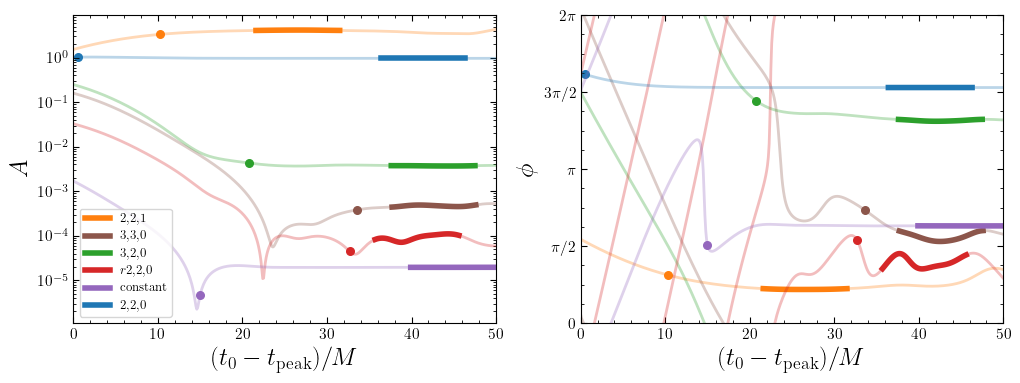

: 

In [134]:
fig, axs = plt.subplots(1,2, figsize = (12, 4))
axs[0].axvspan(-10, 60, color = 'white')
axs[1].axvspan(-10, 60, color = 'white')

for qnm in result.qnm_fixed_list:
    if not hasattr(qnm, 'lmnx_retro'):
        qnm.init_lmnx_retro()
        
plot_amplitudes(result, fixed_modes = result.qnm_fixed_list, ax = axs[0], 
                color_dict = color_dict, use_label = False, 
                legend = True, bold_dict = bold_dict, alpha = 0.3,
                t_flat_start_dict = t_start_dict, flat_start_s = 30)
plot_phases(result, fixed_modes = result.qnm_fixed_list, ax = axs[1], 
            color_dict = color_dict, legend = False, bold_dict = bold_dict, 
            alpha = 0.3, t_flat_start_dict = t_start_dict, flat_start_s = 30)

axs[0].legend(fontsize = 9)

plt.savefig(os.path.join(PLOT_PATH, f"fixed_fit_flat.pdf"), 
            transparent = True, 
            bbox_inches = 'tight')